## 1. Visual stimulus.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### (a) Approximate the visual field (x; y) with a 2-dimensional grid of uniformly-distributed photoreceptors (retina) at ($x_{i}; y_{j}$)

In [2]:
x0 = 5 ## np.deg2rad(5)
y0 = 5 ## np.deg2rad(5)
dx = 0.1 ## np.deg2rad(0.1)
dy = 0.1 ## np.deg2rad(0.1)
nx = int(2*x0/dx)
ny = int(2*y0/dy)

i = np.arange(0,nx+1)
j = np.arange(0,ny+1)

x = -x0 + i*dx
y = -y0 + j*dy

# The meshgrid function returns 
# two 2-dimensional arrays taking in 2 1-dimensional arrays
X2D,Y2D = np.meshgrid(x,y)
print(X2D.shape)
print(Y2D.shape)

(101, 101)
(101, 101)


#### (b) Compute a sinusoidal grating on the grid specified in (a)
s(x; y) =Acos(KxcosΘ +KysinΘ−Φ)

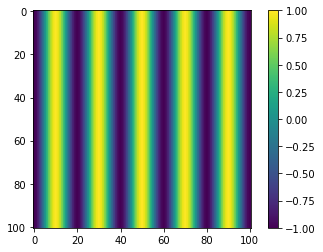

In [3]:
def sinusoidal_grating_function(theta, phi, K, A, x, y):
    return A*np.cos(K*x*np.cos(theta)+ K*y*np.sin(theta) - phi)

s = sinusoidal_grating_function(0, 0, np.pi, 1, X2D, Y2D)
plt.imshow(s)
plt.colorbar()

#### (c) Vary the orientation $\theta$ and the spatial frequency K and plot the resulting gratings.

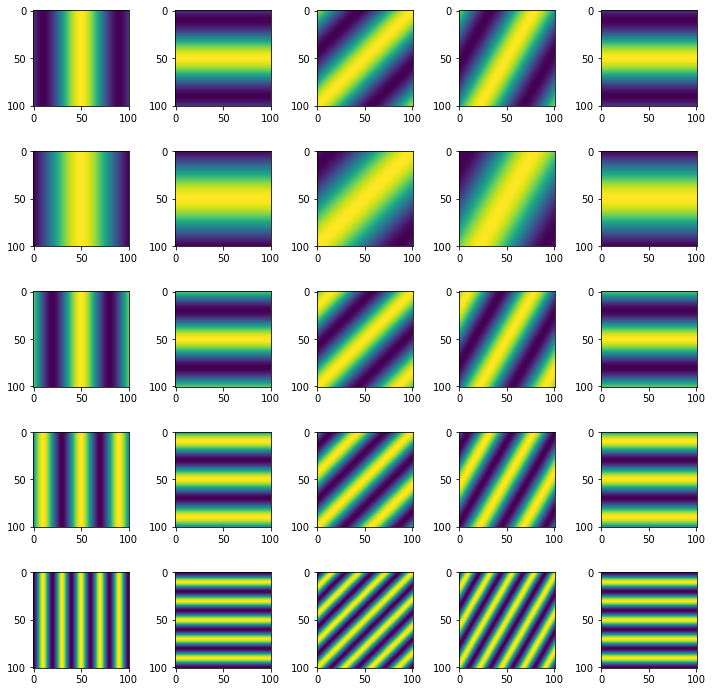

In [4]:
theta = np.array([0, np.pi/2, np.pi/4, np.pi/6, np.pi/2])
K = np.array([np.pi/4, np.pi/6, np.pi/3, np.pi/2, np.pi])

fig, axes = plt.subplots(nrows=len(K), ncols=len(theta), figsize=(10, 10))
for i in range(len(theta)):
    for j in range(len(K)):
        Z1 = sinusoidal_grating_function(theta[i], 0, K[j], 1, X2D, Y2D)
        axes[j][i].imshow(Z1)
        fig.tight_layout()

### 2. A model of receptive fields.
$D_{s}(x, y)$ =1/(2π$σ_{x}σ_{y}$)*exp(−$x^{2}/2σ^{2}_{x}−y^{2}/2σ^{2}_{y}$)cos(kx−φ)

#### (a) Implement a Gabor function as a model of a receptive field

In [5]:
def gabor_function(sigma_x, sigma_y, k, phi, x, y):
    return 1/(2*np.pi*sigma_x*sigma_y)* np.exp(-np.square(x)/(2*np.square(sigma_x)) - np.square(y)/(2*np.square(sigma_y))) *np.cos(k*x - phi)

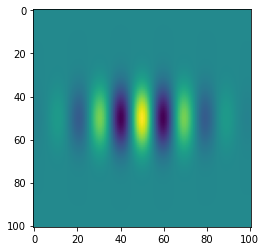

In [6]:
D_s = gabor_function(2, 1, np.pi, 0, X2D, Y2D)
plt.imshow(D_s)

#### (b) What are the optimal stimuli for a neuron with such a RF? Where can you find a neuron with such a RF? Does this RF characterize a simple cell or a complex cell and why?

- **the optimal stimuli for a neuron with such a RF** : The optimal stimuli for a neuron is when it result  in maximum response for a given receptive field. The response is maximum when the orientation(Θ) is 0$^\circ$ and the frequency and phase of the stimulus matches with that of the receptive field (i.e Θ=0, K=k, $\phi_{s}$=$\phi_{r}$ (φ=0)). These can be ON centred and OFF surrounding cells.
- **Where can you find a neuron with such a RF** : These type of cells can be often found in V1 layer of visual cortex.
- **RF characterize a simple cell or a complex cell and why** : This neuron characterizes a simple cell, because there are distinct ON and OFF region and the simluli from different locations within the receptive field sum linearly.

#### (c) The linear response rs of a neuron with receptive field Ds to a visual stimulus s, is given by
    rs=∫s(x, y)Ds(x, y)dxdy

In [7]:
def linear_response(stimulus, gabor_function, dx, dy):
    return np.sum(stimulus * gabor_function * dx * dy)


def linear_response_attribute_specific(sigma_x, sigma_y, theta, phi, K, k, A, x, y):
    s_a = sinusoidal_grating_function(theta, phi, K, A, x, y)
    D_s_a = gabor_function(sigma_x, sigma_y, k, phi, x, y)
    return linear_response(s_a, D_s_a, dx, dy)

In [8]:
r_s = linear_response(s, D_s, dx, dy )
print(f'{r_s = }')

A = np.full(X2D.shape, 1)
r_a = linear_response(A, D_s, dx, dy)
print(f'{r_a = }')


r_s = 0.4943763994158708
r_a = 0.001168698307651164


#### Explain the difference in the resposne.

From plot in 2a) we can see that the receptive field is having a high frequency pattern for bright and dark spots.
- r_s : When the stimulus is given by the plot in 1b(with orientation, phase and frequency matching with that of the receptive field), the response is higher(optimal) when convolved.
- r_a : When the stimulus is a uniformly illuminated visual field, the frequency of the image is not matching with that of the receptive field and thus when convolved, the response gets overridden resulting in a small value.

### 3. Tuning Curve. A tuning curve describes the dependence of the neuronal response on a parameter of the stimulus such as spatial frequency, orientation or phase. Plot the neuronal response r to the grating from the exercise 1b as a function of

#### (a) stimulus orientation $\theta$,

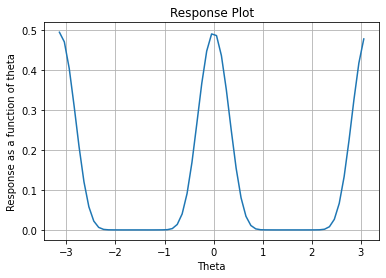

In [9]:
theta = np.arange(-np.pi,np.pi, 0.1)
r = np.ones(len(theta))

for i in range(len(theta)):
    s_a = sinusoidal_grating_function(theta[i], 0, np.pi, 1, X2D, Y2D)
    D_s_a = gabor_function(2, 1, np.pi, 0,  X2D, Y2D)
    r[i] = linear_response(s_a, D_s_a, dx, dy)

plt.plot(theta, r)
plt.grid()
plt.title("Response Plot")
plt.ylabel('Response as a function of theta')
plt.xlabel('Theta')
plt.show()

#### (b) ratio of the stimulus’ spatial frequency to the cell’s preferred value K/k

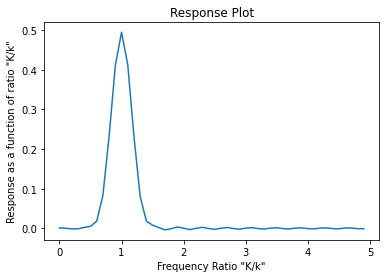

In [10]:
k = np.array([np.pi/3, np.pi/4, np.pi])
ratio = np.arange(0, 5, 0.1)
r = np.ones(len(ratio))
for i in range(len(ratio)):
    for j in range(len(k)):
        r[i] = linear_response_attribute_specific(2, 1, 0, 0, ratio[i]*k[j], k[j], 1, X2D, Y2D)


plt.plot(ratio, r)
plt.title("Response Plot")
plt.ylabel('Response as a function of ratio "K/k"')
plt.xlabel('Frequency Ratio "K/k"')
plt.show()

#### (c) stimulus’ spatial phase $\phi$

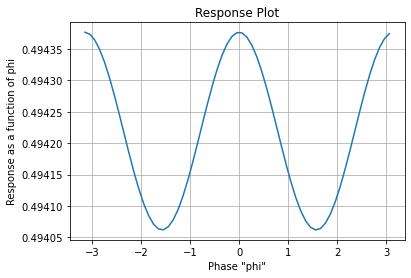

In [11]:
phi = np.arange(-np.pi, np.pi, 0.1)
r = np.ones(len(phi))
for i in range(len(phi)):
    r[i] = linear_response_attribute_specific(2, 1, 0, phi[i], np.pi, np.pi, 1, X2D, Y2D)

plt.plot(phi, r)
    
plt.grid()
plt.title("Response Plot")
plt.ylabel('Response as a function of phi')
plt.xlabel('Phase "phi"')
plt.show()

#### Characterize the receptive field in terms of its selectivity (spatial, orientation and spatial frequency) and preferred stimulus (the stimulus giving rise to maximal response)

The optimal response is obtained, for the following :

- Θ(spatial orientation of the stimulus) = 0  
- K(spatial frequency of the stimulus) = k(cell’s preferred value as per the peceptive field) 
- φ(spatial phase of the stimulus) = 0

Thus as we move away from these values the response decreases. However for Θ and φ, the response would be high again after every interval of $\pi$ as these two values are radial orientation.

### 4. Bonus Exercise: Image Filtering.

#### (a) Load an arbitrary image as a visual stimulus (see Moodle for examples or pick any picture of your choice). For further processing convert the image to grayscale. Hint: You can use *matplotlib.pyplot.imread*.

In [12]:
from skimage.color import rgb2gray

img = plt.imread('im1.png')       
gray = rgb2gray(img)

#### (b) Implement equation 5 for cells with receptive fields centered on the same grid as the input stimulus. As before, assume the stimulus to range from -5$^\circ$ to 5$^\circ$ in both x and y coordinates. Use k = 8$\pi$/degree , $\phi$ = $\pi$/2, $\sigma_{x}$ = $\sigma_{y}$ = 1/8$^\circ$. Plot the original and the resulting image.

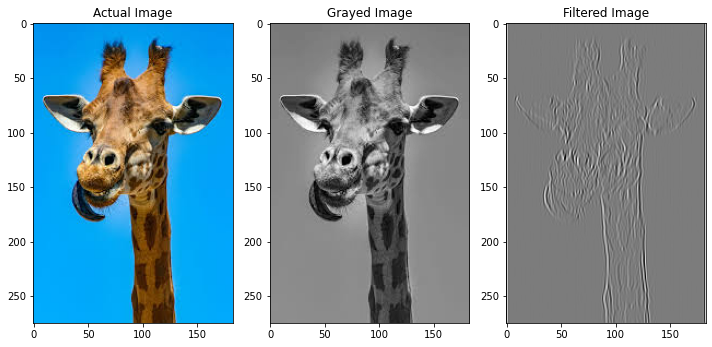

In [13]:
import scipy.signal

s = gray
D_s = gabor_function(1/8, 1/8, 8*np.pi, np.pi/2, X2D, Y2D)
z = scipy.signal.fftconvolve(s, D_s, 'same')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
axes[0].imshow(img)
axes[0].set_title('Actual Image')
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))
axes[1].set_title('Grayed Image')
axes[2].imshow(z, cmap=plt.get_cmap('gray'))
axes[2].set_title('Filtered Image')

fig.tight_layout()

#### Describe what this Gabor filter is doing with the image. What could it be good for?

The Gabor filter gives the highest response at edges and at points where texture changes.Thats why only the edges of the image are left. Gabor filters are special classes of band pass filters, i.e., they allow a certain ‘band’ of frequencies and reject the others. So it analyzes whether there is any specific frequency content in the image in specific directions in a localized region around the point or region of analysis.